In [58]:
import ctypes, time, multiprocessing, os
import numpy as np
import matplotlib.pyplot as plt

# A3.1

In [59]:
_libInC = ctypes.CDLL('./cycletime.so')

In [67]:
_libInC.init_counters(1,0)
print('{}'.format(_libInC.get_cyclecount()))
print("\n")
time.sleep(1)
print('{}'.format(_libInC.get_cyclecount()))

352104


207603027


# A3.2 Testing

In [68]:
def fib(n):
   if n <= 1:
       return n
   else:
       return(fib(n-1) + fib(n-2))

In [72]:
_libInC.init_counters(1, 0)
timeBefore = time.time() 
countBefore = _libInC.get_cyclecount() 

# run recur_fibo() on a specific CPU
n = 5
p1 = multiprocessing.Process(target=fib, args=(n,))
p1.start()
os.system("taskset -p -c {} {}".format(1, p1.pid)) # taskset to pin the process to CPU-1
p1.join()

countAfter = _libInC.get_cyclecount() 
timeAfter = time.time() 

print('cycle count: {}'.format(countAfter-countBefore)) 
print('time spent: {}'.format(timeAfter-timeBefore)) 

pid 11592's current affinity list: 0,1
pid 11592's new affinity list: 1
cycle count: 33152461
time spent: 0.08604812622070312


# A3.2 Data Collection

In [73]:
nTerms = 28
nTrials = 5
avgCycle = np.array([0]*nTerms, dtype=np.double)
stdDevCycle = np.array([0]*nTerms, dtype=np.double)
avgTime = np.array([0]*nTerms, dtype=np.double)
stdDevTime = np.array([0]*nTerms, dtype=np.double)
conv_cycle2time = np.array([0]*nTerms, dtype=np.double)

for i in range(nTerms):
    beforeCount = np.array([0]*nTrials, dtype=np.uint) 
    afterCount = np.array([0]*nTrials, dtype=np.uint) 
    beforeTime = np.array([0]*nTrials, dtype=np.double) 
    afterTime = np.array([0]*nTrials, dtype=np.double) 

    for j in range(nTrials):
        beforeTime[j] = time.time()
        p1 = multiprocessing.Process(target=fib, args=(i+1,))
        _libInC.init_counters(1, 0)
        beforeCount[j] = _libInC.get_cyclecount()
        p1.start()
        os.system("taskset -p -c {} {}".format(0, p1.pid))
        p1.join()
        afterCount[j] = _libInC.get_cyclecount() - beforeCount[j]
        afterTime[j] = time.time() - beforeTime[j]
        print("Total cycle is {}".format(afterCount[j]))
        #print("Total time is {}".format(afterTime[j]))
        #print("Total time converted from cycles is {}".format(afterCount[j]*64/650e6))

    avgCycle[i] = np.average(afterCount)
    stdDevCycle[i] = np.std(afterCount)
    avgTime[i] = np.average(afterTime)
    stdDevTime[i] = np.std(afterTime)

pid 11629's current affinity list: 0,1
pid 11629's new affinity list: 0
Total cycle is 26099716
pid 11632's current affinity list: 0,1
pid 11632's new affinity list: 0
Total cycle is 28821262
pid 11635's current affinity list: 0,1
pid 11635's new affinity list: 0
Total cycle is 28958961
pid 11638's current affinity list: 0,1
pid 11638's new affinity list: 0
Total cycle is 35223057
pid 11641's current affinity list: 0,1
pid 11641's new affinity list: 0
Total cycle is 23993994
pid 11644's current affinity list: 0,1
pid 11644's new affinity list: 0
Total cycle is 27154567
pid 11647's current affinity list: 0,1
pid 11647's new affinity list: 0
Total cycle is 29463846
pid 11650's current affinity list: 0,1
pid 11650's new affinity list: 0
Total cycle is 29462569
pid 11653's current affinity list: 0,1
pid 11653's new affinity list: 0
Total cycle is 32056053
pid 11656's current affinity list: 0,1
pid 11656's new affinity list: 0
Total cycle is 27101895
pid 11659's current affinity list: 0,1
p

# Plotting

<ErrorbarContainer object of 3 artists>

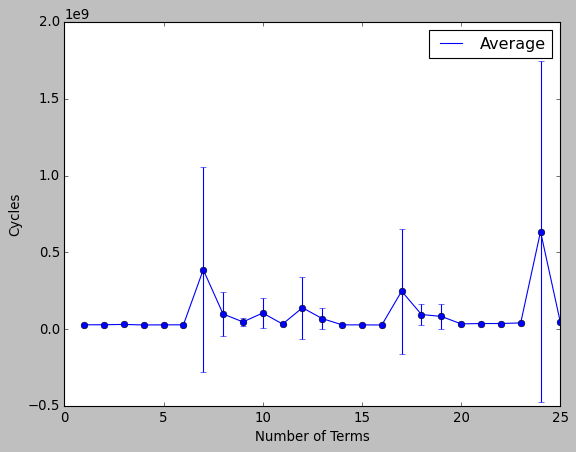

In [74]:
plt.style.use('classic')
fig, ax = plt.subplots()

x = np.array([0]*nTerms)
for i in range(nTerms):
    x[i] = i + 1

ax.plot(x, avgCycle, '-b', label='Average')
# ax.plot(x, stdDevCycle, '--r', label='Std')
plt.xlabel("Number of Terms")
plt.ylabel("Cycles")
leg = ax.legend()
plt.errorbar(x, avgCycle, yerr=stdDevCycle, fmt='o')

<ErrorbarContainer object of 3 artists>

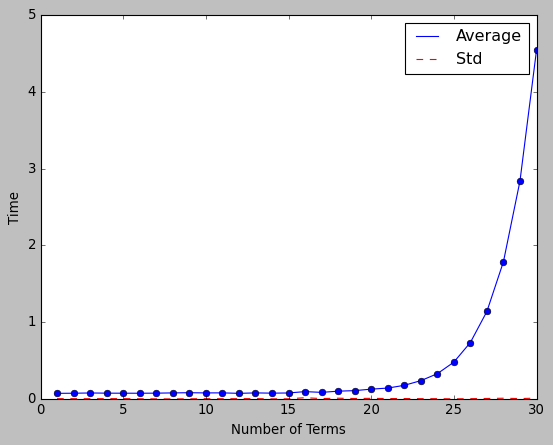

In [56]:
plt.style.use('classic')
fig, ax = plt.subplots()

x = np.array([0]*nTerms)
for i in range(nTerms):
    x[i] = i + 1

ax.plot(x, avgTime, '-b', label='Average')
ax.plot(x, stdDevTime, '--r', label='Std')
plt.xlabel("Number of Terms")
plt.ylabel("Time")
leg = ax.legend()
plt.errorbar(x, avgTime, yerr=stdDevTime, fmt='o')

<ErrorbarContainer object of 3 artists>

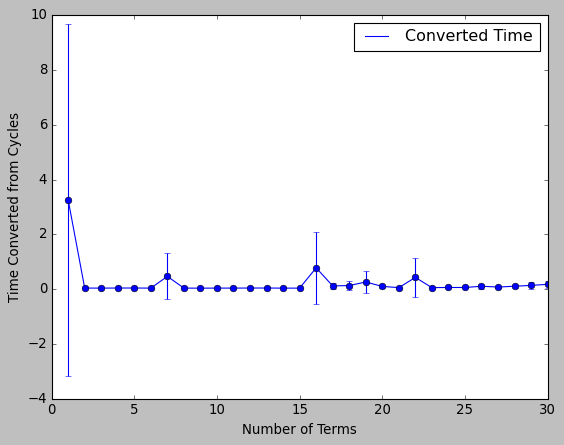

In [57]:
conv_cycle2time_avg = avgCycle * 64/650000000
conv_cycle2time_std = stdDevCycle * 64/650000000

plt.style.use('classic')
fig, ax = plt.subplots()

x = np.array([0]*nTerms)
for i in range(nTerms):
    x[i] = i + 1
    
ax.plot(x, conv_cycle2time_avg, '-b', label='Converted Time')
plt.xlabel("Number of Terms")
plt.ylabel("Time Converted from Cycles")
leg = ax.legend()
plt.errorbar(x, conv_cycle2time_avg, yerr=conv_cycle2time_std, fmt='o')